# **Package Installation and Loading Data**

In [ ]:
! pip install wheel
! pip install pandas
! pip install -U scikit-image
! pip install kaggle

     |████████████████████████████████| 29.2 MB 81 kB/s 
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.16.2
    Uninstalling scikit-image-0.16.2:
      Successfully uninstalled scikit-image-0.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json


In [ ]:
! kaggle datasets download ananthu017/emotion-detection-fer/activity

 95% 62.0M/65.2M [00:00<00:00, 59.0MB/s]
100% 65.2M/65.2M [00:00<00:00, 95.4MB/s]


In [ ]:
! unzip emotion-detection-fer.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

#Basic EDA

In [ ]:
import os
train_data = os.listdir("/content/train")

In [ ]:
train_data

['surprised', 'neutral', 'disgusted', 'sad', 'happy', 'fearful', 'angry']

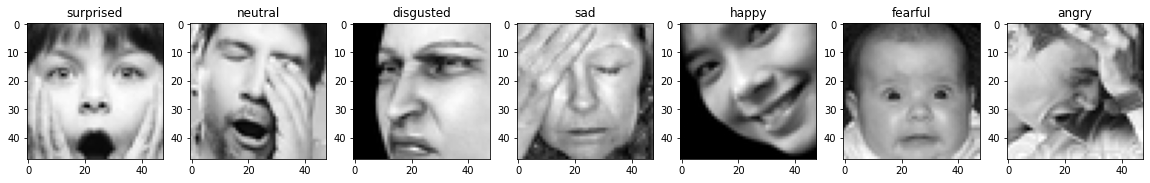

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 7, figsize=(20,20))
for x in range(len(train_data)):
    curr = train_data[x]
    img = os.listdir("/content/train/" + curr + '/')[0]
    result = f"/content/train/{curr}/{img}"
    axes[x].imshow(plt.imread(result), cmap="gray")
    axes[x].set_title(curr)
plt.show()

In [ ]:
df = pd.DataFrame()
X_train = []
X_test = []
label = train_data
for x in label:
  X_train.append(len(os.listdir(f"/content/train/{x}/")))
  X_test.append(len(os.listdir(f"/content/test/{x}/")))
df["label"] = label
df["train data"] = X_train
df["test data"] = X_test
df

,label,train data,test data
0,sad,4830,1247
1,disgust,436,111
2,surprise,3171,831
3,fear,4097,1024
4,neutral,4965,1233
5,angry,3995,958
6,happy,7215,1774


In [ ]:
sum(X_train), sum(X_test)

(28709, 7178)

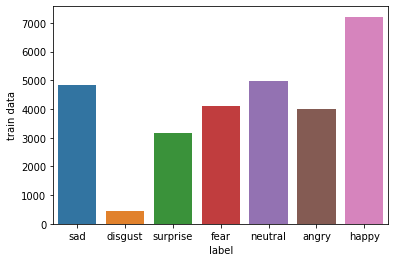

In [ ]:
sns.barplot(data=df, x="label", y = "train data", palette="tab10")

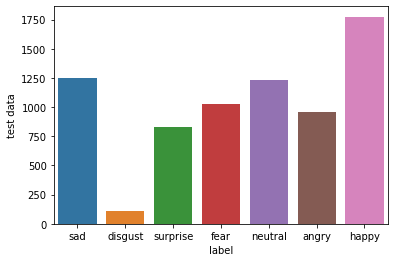

In [ ]:
sns.barplot(data=df, x="label", y = "test data", palette="tab10")

Imbalanced class for digusted

# **Data Augmentation**

In [ ]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define Directories
train_data_dir = "/content/train"
test_data_dir = "/content/test"

# Define Parameters
parameters = {"img_width" : 48,
              "img_height": 48,
              "epochs": 30,
              "batch_size" : 64}

# Define Generators  
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2
)

validation_datagen = ImageDataGenerator(
    rescale = 1/255,
    validation_split = 0.2
)

test_datagen = ImageDataGenerator(
    rescale = 1/255)

# Define Flows from directories
train_generator = train_datagen.flow_from_directory(
    directory = train_data_dir,
    target_size=(parameters["img_width"], parameters["img_height"]),
    batch_size = parameters["batch_size"],
    class_mode= "categorical", 
    subset = "training", 
    color_mode = "grayscale",
    seed = 42)

validation_generator = validation_datagen.flow_from_directory(
    directory = train_data_dir,
    target_size = (parameters["img_width"], parameters["img_height"]),
    batch_size = parameters["batch_size"],
    class_mode='categorical',
    subset = "validation",
    color_mode = "grayscale",
    seed = 42)

testing_generator = test_datagen.flow_from_directory( 
    directory = test_data_dir,
    target_size = (parameters["img_width"], parameters["img_height"]),
    batch_size = parameters["batch_size"],
    color_mode = "grayscale",
    class_mode = "categorical",
    seed = 42)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
train_datagen_all = ImageDataGenerator(
    rescale = 1. / 255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

# Define Flows from directories
train_generator_all = train_datagen.flow_from_directory(
    directory = train_data_dir,
    target_size=(parameters["img_width"], parameters["img_height"]),
    batch_size = parameters["batch_size"],
    class_mode= "categorical", 
    color_mode = "grayscale",
    seed = 42)

Found 28709 images belonging to 7 classes.


## **Example of Data Augmentation**

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import expand_dims

In [ ]:
img = load_img(train_data_dir + "/angry/im0.png")

x = img_to_array(img)
x = x.reshape((1,) + x.shape)

In [ ]:
# Define Generators  
zoom_datagen = ImageDataGenerator(zoom_range = 0.2)
shear_datagen = ImageDataGenerator(shear_range = 0.2)
flip_datagen = ImageDataGenerator(horizontal_flip = True)
comb_datagen = ImageDataGenerator(
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True)

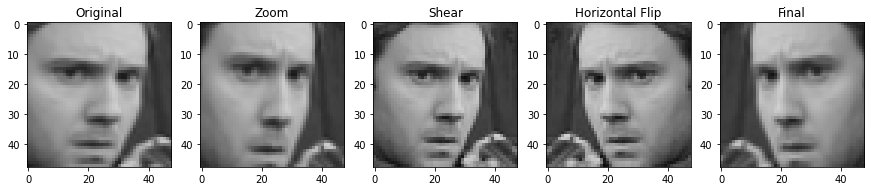

In [ ]:
img = load_img(train_data_dir + "/angry/im0.png")

x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# iterator
zoom_iter = zoom_datagen.flow(x, batch_size = 1)
shear_iter = shear_datagen.flow(x, batch_size = 1)
flip_iter = flip_datagen.flow(x, batch_size = 1)
comb_iter = comb_datagen.flow(x, batch_size = 1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=5, figsize = (15, 15))

# plot original
ax[0].imshow(image)
ax[0].title.set_text('Original')

# convert to unsigned integers
zoom_image = next(zoom_iter)[0].astype('uint8')
shear_image = next(shear_iter)[0].astype('uint8')
flip_image = next(flip_iter)[0].astype('uint8')
comb_image = next(comb_iter)[0].astype('uint8')

# plot image
ax[1].imshow(zoom_image)
ax[1].title.set_text('Zoom')
ax[2].imshow(shear_image)
ax[2].title.set_text('Shear')
ax[3].imshow(flip_image)
ax[3].title.set_text('Horizontal Flip')
ax[4].imshow(comb_image)
ax[4].title.set_text('Final')
plt.show()

# **CNN Model**

In [ ]:
kernel_size = (5, 5)
stride_size = (1, 1)
num_filters = 4

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import cv2

import keras
from keras import regularizers
from keras.preprocessing import image
# from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU, Activation

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

In [ ]:
model = tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size = kernel_size, padding='same', activation='relu', input_shape=(48, 48, 1))) #padding = same, add zero padding
model.add(Conv2D(32, kernel_size = kernel_size, padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,kernel_size = kernel_size, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,kernel_size = kernel_size, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
 
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax')) #multiclass, single label, 7 class

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        832       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        25632     
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 128)       102528    
_________________________________________________________________
batch_normalization_11 (Batc (None, 24, 24, 128)      

In [ ]:
model.compile(
    optimizer = Adam(learning_rate = 0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [ ]:
history = model.fit(x = train_generator, epochs = 30, batch_size = 64, callbacks = callbacks, validation_data = validation_generator) #early stopping to prevent overfit

Epoch 1/30
359/359 [==============================] - 29s 76ms/step - loss: 1.9750 - accuracy: 0.2681 - val_loss: 2.7216 - val_accuracy: 0.1719
Epoch 2/30
359/359 [==============================] - 27s 75ms/step - loss: 1.6518 - accuracy: 0.3673 - val_loss: 1.6910 - val_accuracy: 0.3759
Epoch 3/30
359/359 [==============================] - 27s 74ms/step - loss: 1.5117 - accuracy: 0.4210 - val_loss: 1.5489 - val_accuracy: 0.4149
Epoch 4/30
359/359 [==============================] - 27s 75ms/step - loss: 1.4194 - accuracy: 0.4558 - val_loss: 1.3623 - val_accuracy: 0.4745
Epoch 5/30
359/359 [==============================] - 27s 74ms/step - loss: 1.3314 - accuracy: 0.4874 - val_loss: 1.5174 - val_accuracy: 0.4088
Epoch 6/30
359/359 [==============================] - 27s 75ms/step - loss: 1.2722 - accuracy: 0.5158 - val_loss: 1.2527 - val_accuracy: 0.5166
Epoch 7/30
359/359 [==============================] - 27s 75ms/step - loss: 1.2307 - accuracy: 0.5354 - val_loss: 1.2222 - val_accuracy:

In [ ]:
train_score = model.evaluate(train_generator, verbose = 0)
val_score = model.evaluate(validation_generator, verbose = 0)
print(f'Train loss: {train_score[0]} / Train accuracy: {train_score[1]}')
print(f'Validation loss: {val_score[0]} / Validation accuracy: {val_score[1]}')

Train loss: 0.613407552242279 / Train accuracy: 0.7783002257347107
Validation loss: 1.0739060640335083 / Validation accuracy: 0.6293328404426575


In [ ]:
history2 = model.fit(train_generator_all, epochs = 30, batch_size = 64)

Epoch 1/30
449/449 [==============================] - 31s 69ms/step - loss: 0.8344 - accuracy: 0.6972
Epoch 2/30
449/449 [==============================] - 31s 69ms/step - loss: 0.8115 - accuracy: 0.7026
Epoch 3/30
449/449 [==============================] - 31s 68ms/step - loss: 0.8032 - accuracy: 0.7063
Epoch 4/30
449/449 [==============================] - 31s 69ms/step - loss: 0.7848 - accuracy: 0.7111
Epoch 5/30
449/449 [==============================] - 31s 69ms/step - loss: 0.7749 - accuracy: 0.7129
Epoch 6/30
449/449 [==============================] - 31s 69ms/step - loss: 0.7544 - accuracy: 0.7216
Epoch 7/30
449/449 [==============================] - 31s 69ms/step - loss: 0.7370 - accuracy: 0.7274
Epoch 8/30
449/449 [==============================] - 31s 69ms/step - loss: 0.7244 - accuracy: 0.7322
Epoch 9/30
449/449 [==============================] - 31s 69ms/step - loss: 0.7166 - accuracy: 0.7344
Epoch 10/30
449/449 [==============================] - 31s 69ms/step - loss: 0.698

# **Performance Evaluation**

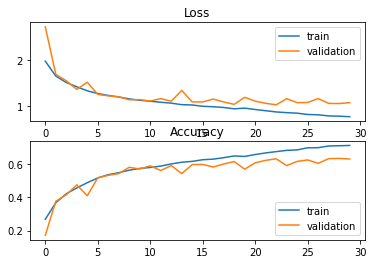

In [ ]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [ ]:
test_score = model.evaluate(testing_generator, verbose = 0)
print(f'Test loss: {test_score[0]} / Test accuracy: {test_score[1]}')

Test loss: 1.1507148742675781 / Test accuracy: 0.6567289233207703


## **Model Performance on Test Data**

In [ ]:
import os
from skimage.io import imread
from skimage.transform import resize

In [ ]:
# Load Test Data
Categories=['angry','disgusted','fearful', 'happy', 'neutral', 'sad', 'surprised']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='test' 
#path which contains all the categories of images
for i in Categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        image=resize(img_array,(48,48))
        flat_data_arr.append(image.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

loading... category : angry
loaded category:angry successfully
loading... category : disgusted
loaded category:disgusted successfully
loading... category : fearful
loaded category:fearful successfully
loading... category : happy
loaded category:happy successfully
loading... category : neutral
loaded category:neutral successfully
loading... category : sad
loaded category:sad successfully
loading... category : surprised
loaded category:surprised successfully


In [ ]:
# Prepare Testing Data
x_test = np.array(x)
x_test = x_test.reshape(len(x_test), 48, 48, 1)
test_y = np.array(y)

# Predict Labels on Test Data
y_pred = model.predict(x_test)

# Get Labels of Test Data
pred_y = np.argmax(y_pred,axis=1)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
print('Confusion Matrix')
print(confusion_matrix(test_y, pred_y))

Confusion Matrix
[[ 554    8   81   48  116  123   28]
 [  21   69    5    2    4    9    1]
 [ 104    4  476   50  132  178   80]
 [  53    0   30 1511   91   50   39]
 [  78    2   68   93  798  171   23]
 [ 141    0  127   75  244  641   19]
 [  25    0   66   34   25   16  665]]


In [ ]:
print('Classification Report')
print(classification_report(test_y, pred_y, target_names = Categories))

Classification Report
              precision    recall  f1-score   support

       angry       0.57      0.58      0.57       958
   disgusted       0.83      0.62      0.71       111
     fearful       0.56      0.46      0.51      1024
       happy       0.83      0.85      0.84      1774
     neutral       0.57      0.65      0.60      1233
         sad       0.54      0.51      0.53      1247
   surprised       0.78      0.80      0.79       831

    accuracy                           0.66      7178
   macro avg       0.67      0.64      0.65      7178
weighted avg       0.66      0.66      0.65      7178



## **Example of Misclassification**

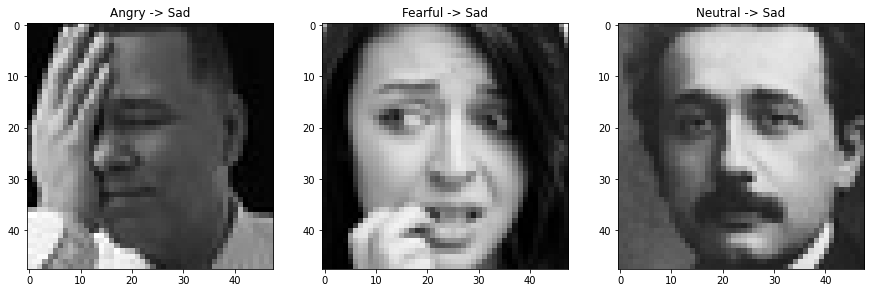

In [ ]:
index = []
title = ['Angry -> Sad', 'Fearful -> Sad', 'Neutral -> Sad']

angry = np.where(test_y == 0)
fear = np.where(test_y == 2)
neutral = np.where(test_y == 4)
sad_pred = np.where(pred_y == 5)

# angry misclassified as sad
angry_to_sad = np.intersect1d(angry, sad_pred)
index.append(angry_to_sad[2])
# fear misclassified as sad
fear_to_sad = np.intersect1d(fear, sad_pred)
index.append(fear_to_sad[0])
# neutral misclassified as sad
neu_to_sad = np.intersect1d(neutral, sad_pred)
index.append(neu_to_sad[2])

Categories = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
datadir = 'test'
count = 0
count_img = 0

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (15, 15))

# loop through to find misclassified images
for i in Categories:
    path = os.path.join(datadir, i)
    for img in os.listdir(path):
        count += 1
        if (count in index) :
            image = cv2.imread(os.path.join(path, img))
            # plot
            ax[count_img].imshow(image)
            ax[count_img].title.set_text(title[index.index(count)])
            count_img += 1            

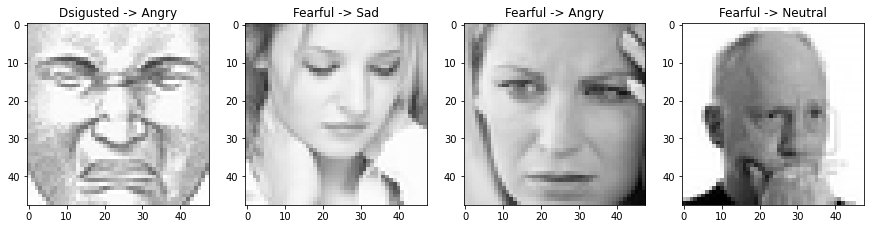

In [ ]:
index = []
title = ['Dsigusted -> Angry', 'Fearful -> Angry', 'Fearful -> Neutral', 'Fearful -> Sad']

disgusted = np.where(test_y == 1)
fear = np.where(test_y == 2)
angry_pred = np.where(pred_y == 0)
neu_pred = np.where(pred_y == 4)
sad_pred = np.where(pred_y == 5)

# disgusted misclassified as angry
dis_to_angry = np.intersect1d(disgusted, angry_pred)
index.append(dis_to_angry[1])
# fear misclassified as angry
fear_to_angry = np.intersect1d(fear, angry_pred)
index.append(fear_to_angry[7])
# fear misclassified as neutral
fear_to_neu = np.intersect1d(fear, neu_pred)
index.append(fear_to_neu[4])
# fear misclassified as sad
fear_to_sad = np.intersect1d(fear, sad_pred)
index.append(fear_to_sad[2])


Categories = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
datadir = 'test'
count = 0
count_img = 0

fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (15, 15))

# loop through to find misclassified images
for i in Categories:
    path = os.path.join(datadir, i)
    for img in os.listdir(path):
        count += 1
        if (count in index) :
            image = cv2.imread(os.path.join(path, img))
            # plot
            ax[count_img].imshow(image)
            ax[count_img].title.set_text(title[index.index(count)])
            count_img += 1 